# AC/IC analysis

#### 2018/09 first created by DS
#### 2019/07/23 UPDATED as outdated


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sci
import statsmodels.formula.api as smf
import matplotlib.collections as clt
import re
import pylab as pl
from nems_lbhb.pupil_behavior_scripts.mod_per_state import get_model_results_per_state_model
from nems_lbhb.pupil_behavior_scripts.mod_per_state import aud_vs_state
from nems_lbhb.pupil_behavior_scripts.mod_per_state import hlf_analysis
from nems_lbhb.stateplots import model_per_time_wrapper, beta_comp

%matplotlib inline
os.getcwd()

color_b = '#C768D8'
color_p = '#47BF55'
color_both = 'black'
color_either = '#595959'
color_ns = 'lightgrey'

savefigs = True
figs_dir = '/Users/daniela/Documents/2018/AC_IC_project_2018/Task_engagement_pupil_paper/figures'
path=os.getcwd()

[nems0.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2019-07-18 155305.log


## Functions

In [2]:
def find_sig_cellids(df, state_chan_val='active', condition='pb', sign_type = 'beh'):
    '''it takes a Pandas df as an argument and returns a Pandas series with cellids that are significantly modulated 
    by behavior if sign_type 'beh' according to P
    If sign_type = 'state', then it pulls out untis significantly modulated by either state, pupil or behavior'''
    
    if condition=='pb' and sign_type == 'beh':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup0.beh']-df_r['st.pup0.beh0']
        df_rse['r_sum'] = df_rse['st.pup0.beh']+df_rse['st.pup0.beh0']
        
    elif condition=='pb' and sign_type == 'ubeh':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup.beh0']
        df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup.beh0']
        
    elif condition=='pb' and sign_type == 'upup':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup0.beh']
        df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup0.beh']
        
    elif condition=='pb' and sign_type == 'state':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup0.beh0']
        df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup0.beh0']
        
    elif condition=='pp' and sign_type == 'beh':
        df_state = df[df['state_chan_alt']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
        df_r['r_diff'] = df_r['st.pup0.pas']-df_r['st.pup0.pas0']
        df_rse['r_sum'] = df_rse['st.pup0.pas']+df_rse['st.pup0.pas0']
        
        
    elif condition=='pp' and sign_type == 'state':
        df_state = df[df['state_chan_alt']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
        df_r['r_diff'] = df_r['st.pup0.pas']-df_r['st.pup0.pas0']
        df_rse['r_sum'] = df_rse['st.pup0.pas']+df_rse['st.pup0.pas0']
        
        
    elif condition=='pf' and sign_type == 'beh':
        df_state = df[df['state_chan_alt']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
        df_r['r_diff'] = df_r['st.pup0.fil']-df_r['st.pup0.fil0']
        df_rse['r_sum'] = df_rse['st.pup0.fil']+df_rse['st.pup0.fil0']
        
        
    elif condition=='fil' and sign_type == 'state':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.fil']-df_r['st.fil0']
        df_rse['r_sum'] = df_rse['st.fil']+df_rse['st.fil0']
        
        
    cellid_sig = df_r[df_r['r_diff']>df_rse['r_sum']].index
    
    return cellid_sig

In [3]:
def one_state(df, col_idx='MI', state='only', state_chan_val='active', state_sig1='st.pup0.beh', state_sig2='st.pup0.beh0',
              state_var='task', condition='pb', absolute=None, columns_to_keep=None):
    '''it takes a dataframe and a column_index and it returns two dfs with the difference between the values of 
    the column index one for all cells one for significant cells. e.g. for MI, MIbeh = MIpup0beh-MIpup0beh0.
    if absolute is set to 1, then there will be another column with col_idx absolute value'''
    
    if condition=='pb':
        df_state = df[df['state_chan']==state_chan_val]
    
        df_ss1 = df_state[df_state['state_sig']==state_sig1]
        df_ss2 = df_state[df_state['state_sig']==state_sig2]
    
        # pivot model 1 and 2 to have the column_index for each state_chan
        df_ss1_col_idx = df_ss1.pivot(index='cellid', columns='state_chan', values=col_idx)
        df_ss2_col_idx = df_ss2.pivot(index='cellid', columns='state_chan', values=col_idx)
    
    elif condition=='pp' or condition=='pf' or condition=='fil':
        df_state = df[df['state_chan_alt']==state_chan_val]
    
        df_ss1 = df_state[df_state['state_sig']==state_sig1]
        df_ss2 = df_state[df_state['state_sig']==state_sig2]
    
        # pivot model 1 and 2 to have the column_index for each state_chan
        df_ss1_col_idx = df_ss1.pivot(index='cellid', columns='state_chan_alt', values=col_idx)
        df_ss2_col_idx = df_ss2.pivot(index='cellid', columns='state_chan_alt', values=col_idx)
        
    
    #change name of column to prepare for merging
    df_ss2_col_idx = df_ss2_col_idx.rename(index=str, columns={state_chan_val:state_chan_val+'0'})
    
    #reset index to get rid of multindexing in model 1 and 2
    df_ss1_col_idx = df_ss1_col_idx.reset_index()
    df_ss2_col_idx = df_ss2_col_idx.reset_index()
    
    # join dataframes
    df_col_idx_state = pd.merge(df_ss1_col_idx, df_ss2_col_idx, how='left', on='cellid')
    
    # add column with difference between state_chan and state_chan0
    df_col_idx_state[col_idx+'_'+state_var+'_'+state] = df_col_idx_state[state_chan_val]-df_col_idx_state[state_chan_val+'0']
    
    # set the index back to cellid to apply the loc method and get the significant cells
    df_col_idx_state = df_col_idx_state.set_index('cellid')
    
    # if absolute is set to 1, then there will be another column with col_idx absolute value
    if absolute==1:
        df_col_idx_state[col_idx+'_'+state_var+'_'+state+'_abs'] = abs(df_col_idx_state[col_idx+'_'+state_chan_val+'_'+state])
    
    #df_col_idx_state = df_col_0idx_state[col_idx+'_'+state_chan_val+'_'+state]
    
    if columns_to_keep:
        # Initialize empty columns to keep all to false
        for col in columns_to_keep:
            df_col_idx_state[col] = None
        # Now fill those columns with the correct values for those cells
        for cellid in df_col_idx_state.index.values.tolist():
            matching_rows =  df[df['cellid'] == cellid]
            # print(matching_rows)
            # print(matching_rows.iloc[0])
            #print(matching_rows.iloc[0][col])
            for col in columns_to_keep:
                df_col_idx_state.at[cellid, col] = matching_rows.iloc[0][col]
                
    return df_col_idx_state

In [4]:
def scatter_states(df1, df2, column1, column2, brain_region, xlim, ylim, dot_size1=2, dot_size2=4, 
                   colors = [color_ns, color_either, color_b, color_p, color_both],
                   title='scatter_states',
                   margin=True, area=None, bins=None, cellid=None):
    '''The basics of this function takes two data frames and specific columns for each data frame
    (eg 'MI_active_only' or 'R2_active_unique') and plots the scatter plot between those and the significant units.
    
    If margin=True, it will plot the marginal distributions'''
    
    sns.set(style="white")

    # Plot non-significant cells first
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==False) & (df1['sig_state']==False)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==False) & (df1['sig_state']==False)]
    print('not sig n = {}'.format(len(subset_df1)))
    color = colors[0]
    if area=='A1' or area=='ICX':
        scatplot = sns.JointGrid(x=subset_df1[column1], y=subset_df2[column2], xlim=xlim, ylim=ylim)
        scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1, linewidth=0.3)
        
    else:
        scatplot = sns.JointGrid(x=subset_df1[column1], y=subset_df2[column2], xlim=xlim, ylim=ylim)
        scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1, linewidth=0.3, marker = '^')
    

    # Plot the significant ubeh or upup cells
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==False) & (df1['sig_state']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==False) & (df1['sig_state']==True)]
    print('ubeh or upup n = {}'.format(len(subset_df1)))
    color = colors[1]
    if area=='A1' or area=='ICX':
        scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, 
                                  edgecolor='white', linewidth=0.3)
    else:
        scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, 
                                  edgecolor='white', linewidth=0.3, marker='^')
    
    # Plot sig_ubeh cells
    subset_df1 = df1[(df1['sig_ubeh']==True) & (df1['sig_upup']==False)]
    subset_df2 = df2[(df2['sig_ubeh']==True) & (df2['sig_upup']==False)]
    print('ubeh n = {}'.format(len(subset_df1)))
    color = colors[2]
    if area=='A1' or area=='ICX':
        scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, 
                                  s=dot_size2, edgecolor='white', linewidth=0.3)
    else:
        scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, 
                                  s=dot_size2, edgecolor='white', linewidth=0.3, marker='^')
    
    # Plot sig_upup cells 
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==True)]
    print('upup n = {}'.format(len(subset_df1)))
    color = colors[3]
    if area=='A1' or area=='ICX':
        scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, 
                                  s=dot_size2, edgecolor='white', linewidth=0.3)
    else:
        scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, 
                                  s=dot_size2, edgecolor='white', linewidth=0.3, marker='^')
    
    # Plot the significant both pup and beh
    subset_df1 = df1[(df1['sig_ubeh']==True) & (df1['sig_upup']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==True) & (df2['sig_upup']==True)]
    print('ubeh and upup = {}'.format(len(subset_df1)))
    color = colors[4]
    if area=='A1' or area=='ICX':
        scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, 
                                  s=dot_size2, edgecolor='white', linewidth=0.3)
    else:
        scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, 
                                  s=dot_size2, edgecolor='white', linewidth=0.3, marker='^')

    
    
    # scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1)

    
#     if df2_sig is None:
#         scatplot = sns.scatterplot(x=df1[column1], y=df2[column2], alpha=1, color=color, size=dot_size1)
#         plt.xlim(xlim)
#         plt.ylim(ylim)
#         scatplot.set_aspect('equal')
        
#     elif df2_sig is not None and margin == False:
#         scatplot = sns.JointGrid(x=df1[column1], y=df2[column2], xlim = xlim, ylim = ylim)
#         # Plot the cells
#         scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1)
#         scatplot.ax_joint.scatter(df1_sig[column1], df2_sig[column2], color=color_sig, edgecolor='white', s=dot_size2)
        
#     elif df2_sig is not None and margin == True:
#         scatplot = sns.JointGrid(x=df1[column1], y=df2[column2], xlim = xlim, ylim = ylim)
#         scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1)
#         scatplot.ax_joint.scatter(df1_sig[column1], df2_sig[column2], color=color_sig, edgecolor='white', s=dot_size2)
         
#         _ = scatplot.ax_marg_x.hist(df1[column1], color=color, edgecolor='white', alpha=1, bins=bins)
#         _ = scatplot.ax_marg_y.hist(df2[column2], color=color, edgecolor='white', alpha=1, orientation='horizontal', bins=bins)
        
#         _ = scatplot.ax_marg_x.hist(df1_sig[column1], color=color_sig, edgecolor='white', alpha=1, bins=bins)
#         _ = scatplot.ax_marg_y.hist(df2_sig[column2], color=color_sig, edgecolor='white', alpha=1, orientation='horizontal',
#                                    bins=bins)
    
    plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
    plt.axhline(0, linestyle='--', linewidth=0.5, color='k')

    # need a slope and c to fix the position of line
    slope = 1
    c = xlim[0]

    x_min = xlim[0]
    x_max = xlim[1]
    y_min, y_max = c, c + slope*(x_max-x_min)
    plt.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
    
    plt.xlabel(brain_region+'_'+column1)
    plt.ylabel(brain_region+'_'+column2) 
    
    plt.savefig(brain_region+'_'+column1+column2+title+area+'.pdf')

In [5]:
def aud_vs_state(df, title, nb=5, state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'], area=None):
    """
    modified from SVD function from mod_per_state imported here on Nov 13, 2018 DS
    
    d = dataframe output by get_model_results_per_state_model()
    nb = number of bins
    """

    plt.figure(figsize=(4,6))
    
    if area is not None:
        da = df[df['state_chan']=='active']
        da = da[da['area']==area]
        
    else:
        da = df[df['state_chan']=='active']

    dp = da.pivot(index='cellid',columns='state_sig',values=['r','r_se'])

    dr = dp['r'].copy()
    dr['b_unique'] = dr[state_list[3]]**2 - dr[state_list[2]]**2
    dr['p_unique'] = dr[state_list[3]]**2 - dr[state_list[1]]**2
    dr['bp_common'] = dr[state_list[3]]**2 - dr[state_list[0]]**2 - dr['b_unique'] - dr['p_unique']
    dr['bp_full'] = dr['b_unique']+dr['p_unique']+dr['bp_common']
    dr['null']=dr[state_list[0]]**2 * np.sign(dr[state_list[0]])
    dr['full']=dr[state_list[3]]**2 * np.sign(dr[state_list[3]])

    dr['sig']=((dp['r'][state_list[3]]-dp['r'][state_list[0]]) > \
         (dp['r_se'][state_list[3]]+dp['r_se'][state_list[0]]))

    #dm = dr.loc[dr['sig'].values,['null','full','bp_common','p_unique','b_unique']]
    dm = dr.loc[:,['null','full','bp_common','p_unique','b_unique','sig']]
    dm = dm.sort_values(['null'])
    mfull=dm[['null','full','bp_common','p_unique','b_unique','sig']].values

    if nb > 0:
        stepsize=mfull.shape[0]/nb
        mm=np.zeros((nb,mfull.shape[1]))
        for i in range(nb):
            #x0=int(np.floor(i*stepsize))
            #x1=int(np.floor((i+1)*stepsize))
            #mm[i,:]=np.mean(m[x0:x1,:],axis=0)
            x01=(mfull[:,0]>i/nb) & (mfull[:,0]<=(i+1)/nb)
            mm[i,:]=np.nanmean(mfull[x01,:],axis=0)
        print(np.round(mm,3))

        m = mm.copy()
    else:
        # alt to look at each cell individually:
        m = mfull.copy()

    mb=m[:,2:]

    ax1 = plt.subplot(3,1,1)
    beta_comp(mfull[:,0],mfull[:,1],n1='State independent',n2='Full state-dep',
                         ax=ax1, highlight=dm['sig'], hist_range=[-0.1, 1])

    ax2 = plt.subplot(3,1,2)
    colors = ['darkgrey', color_p, color_ba]
    ind = np.arange(mb.shape[0])
    width=0.8
    #ind = m[:,0]
    p1 = plt.bar(ind, mb[:,0], width=width, color=colors[0])
    p2 = plt.bar(ind, mb[:,1], width=width, bottom=mb[:,0], color=colors[1])
    p3 = plt.bar(ind, mb[:,2], width=width, bottom=mb[:,0]+mb[:,1], color=colors[2])
    plt.legend(('common','p_unique','b_unique'))
    if title is not None:
        plt.title(title)
    plt.xlabel('behavior-independent quintile')
    plt.ylabel('mean r2')

    ax3 = plt.subplot(3,1,3)
    #ind = np.arange(mb.shape[0])
    ind = m[:,0]
    p1 = plt.plot(ind, mb[:,0], color=colors[0])
    p2 = plt.plot(ind, mb[:,1]+mb[:,0], color=colors[1])
    p3 = plt.plot(ind, mb[:,2]+mb[:,0]+mb[:,1], color=colors[2])
    plt.legend(('common','p_unique','b_unique'))
    plt.xlabel('behavior-independent quintile')
    plt.ylabel('mean r2')

   # plt.tight_layout()
    
    plt.savefig(title+'.pdf')
    
    return ax1, ax2, ax3

## 1) Does task engagement (ignoring pupil) modulate neuronal activity in AC and IC? 

### a) A1 307 MUA + SUA results 

In [6]:
# RUN IF CONNECTED TO SERVER
# A1 SUA+MUA: pup vs. beh 307 per state dataframe
#batch = 307  # A1 SUA and MUA
#state_list = ['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh']
#basemodel = "-ref-psthfr.s_sdexp.S"
#d_pb307 = get_model_results_per_state_model(batch=batch, state_list=state_list, basemodel=basemodel)

# Add column with R2 for variance analysis
#d_pb307['R2'] = d_pb307['r']**2

# RUN BY SVD ON JANUARY 5, 2019 - 
# batch = 307  # A1 SUA and MUA

# # pup vs. active/passive
# state_list = ['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh']
# basemodel = "-ref-psthfr.s_sdexp.S"
# d = get_model_results_per_state_model(batch=batch, state_list=state_list, basemodel=basemodel)
# d.to_csv('d_fil_307.csv')

# # fil only
# state_list = ['st.fil0','st.fil']
# basemodel = "-ref-psthfr.s_stategain.S"
# loader = "psth.fs20-ld-"
# d = get_model_results_per_state_model(batch=batch, state_list=state_list,
#                                       basemodel=basemodel, loader=loader)
# d.to_csv('d_307_pb.csv')

In [7]:
# RUN IF NOT CONNECTED TO SERVER 
# A1 SUA+MUA: pup vs. beh 307 per state dataframe
#d_pb307 = pd.read_csv('d_307_pb.csv') #model sdexp.S rerun November 8 
d_pb307 = pd.read_csv('d_307_pb_updated.csv') #model s_sdexp.S rerun January 5 by SVD
d_pb307 = d_pb307.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pb307['R2'] = d_pb307['r']**2 * np.sign(d_pb307['r'])

In [8]:
# Example cells TAR010c-27-2 (A1 behavior cell)
#d_pb307.loc[d_pb307['cellid']=='TAR010c-27-2']

# Example cells TAR010c-06-1 (A1 pupil cell)
#d_pb307.loc[d_pb307['cellid']=='TAR010c-06-1']

**Find A1 units for which the model prediction with behavior as only state variable signifantly predicts behavior modulation**  
significant beh only cells = r_pup0_beh - r_pup0_beh0 > rse_pup0_beh + rse_pup0_beh0 where 'r' is Pearson's correlation

In [9]:
cellid_sig_307_beh = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'beh')

**Find A1 units for which the unique contribution of behavior is significant**  
significant beh unique cells = r_pup_beh - r_pup_beh0 > rse_pup_beh + rse_pup_beh0 where 'r' is Pearson's correlation

In [10]:
cellid_sig_307_ubeh = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'ubeh')

**Find A1 units for which the unique contribution of pupil is significant** 
significant pupil unique cells = r_pup_beh - r_pup0_beh > rse_pup_beh + rse_pup0_beh where 'r' is Pearson's correlation

In [11]:
cellid_sig_307_upup = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'upup')

**Find A1 units for which the full state model is significant better than the null model (ambiguous)**   
significant state cells = r_pup_beh - r_pup0_beh0 > rse_pup_beh + rse_pup0_beh0 where 'r' is Pearson's correlation

In [12]:
cellid_sig_307_state = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'state')

In [13]:
print(len(cellid_sig_307_state))
print(len(cellid_sig_307_upup))
print(len(cellid_sig_307_ubeh))

51
16
15


In [14]:
# add three columns to original data frame with sign cells per category
d_pb307['sig_ubeh'] = d_pb307['cellid'].isin(set(cellid_sig_307_ubeh))
d_pb307['sig_upup'] = d_pb307['cellid'].isin(set(cellid_sig_307_upup))
d_pb307['sig_state'] = d_pb307['cellid'].isin(set(cellid_sig_307_state))

**Scatter plot of R2beh unique vs R2pup unique in A1**  
`(R2pup0beh - R2pup0beh0) vs (R2pupbeh0 - R2pup0beh0)

In [15]:
# use one_state funciton to pull a dataframe containing R2beh unique, wich is the difference between R2pupbeh and R2pupbeh0
d307_R2_beh_unique = one_state(d_pb307, col_idx='R2', state='unique', state_chan_val='active', 
                               state_sig1='st.pup.beh', state_sig2='st.pup.beh0', state_var='task', 
                               condition='pb', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

In [16]:
d307_R2_beh_unique.head()

state_chan,active,active0,R2_task_unique,sig_ubeh,sig_upup,sig_state
cellid,,,,,,
BRT026c-02-1,0.164054,0.149456,0.014597,False,False,True
BRT026c-02-2,0.227246,0.229285,-0.002039,False,False,False
BRT026c-05-1,0.278367,0.276914,0.001453,False,False,False
BRT026c-05-2,0.279223,0.261035,0.018188,False,False,True
BRT026c-07-1,0.245896,0.213772,0.032124,False,False,True


In [17]:
d307_R2_beh_unique.loc['TAR010c-06-1']

state_chan
active              0.526578
active0             0.516795
R2_task_unique    0.00978246
sig_ubeh               False
sig_upup                True
sig_state               True
Name: TAR010c-06-1, dtype: object

In [18]:
# use one_state funciton to pull a dataframe containing R2pup unique, wich is the difference between R2pupbeh and R2pup0beh
d307_R2_pup_unique = one_state(d_pb307, col_idx='R2', state='unique', state_chan_val='pupil', 
                               state_sig1='st.pup.beh', state_sig2='st.pup0.beh', condition='pb',
                               state_var='pupil', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

not sig n = 78
ubeh or upup n = 24
ubeh n = 11
upup n = 12
ubeh and upup = 4


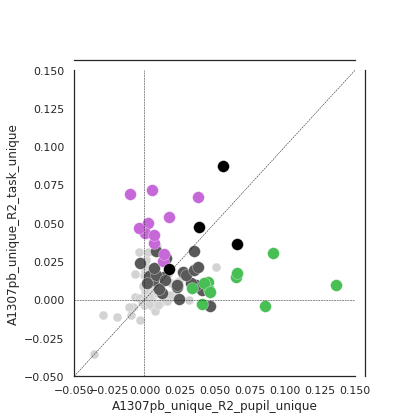

In [19]:
scatter_states(df1=d307_R2_pup_unique, 
               df2=d307_R2_beh_unique,
               margin=False, 
               area='A1',
               column1='R2_pupil_unique', 
               column2='R2_task_unique',
               brain_region='A1307pb_unique', 
               xlim=(-0.05,0.15), ylim=(-0.05,0.15), 
               dot_size1=80, dot_size2=140)

In [20]:
# verify if correlation is significant
(cc_R2_307, p_R2_307)=sci.stats.pearsonr(d307_R2_pup_unique['R2_pupil_unique'], d307_R2_beh_unique['R2_task_unique'])
print(cc_R2_307, p_R2_307)

0.39838294141384734 2.928497721436365e-06


[[0.148 0.19  0.008 0.018 0.016 0.569]
 [0.368 0.408 0.009 0.019 0.011 0.282]
 [0.624 0.659 0.01  0.011 0.015 0.238]
 [0.849 0.873 0.009 0.01  0.006 0.182]]


NameError: name 'color_ba' is not defined

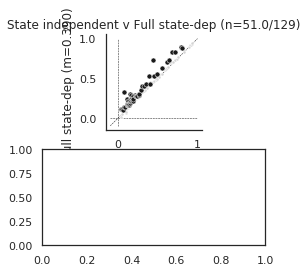

In [21]:
# using SVD function to pull out r2 scatter and stack
aud_vs_state(d_pb307, title='A1307_R2', nb=4, state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'])

### b) IC 309 MUA + SUA results 

In [22]:
# IC SUA+MUA: pup vs. beh 309 per state dataframe
#d_pb309 = pd.read_csv('d_309_pb.csv')
d_pb309 = pd.read_csv('d_309_pb_updated.csv')
d_pb309 = d_pb309.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pb309['R2'] = d_pb309['r']**2 * np.sign(d_pb309['r'])

In [23]:
# load csv with info about ICC and ICX
d_IC_area = pd.read_csv('IC_cells_area.csv')

In [24]:
d_pb309 = pd.merge(left=d_pb309, right=d_IC_area, how='outer', on='cellid')

In [25]:
d_pb309.head()

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2,area
0,BRT016f-a1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,95.0,0.739416,0.011597,0.397252,1.186683,baseline,0.546736,ICC
1,BRT016f-a1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,-0.001858,95.0,0.739416,0.011597,0.012197,0.012355,pupil,0.546736,ICC
2,BRT016f-a1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,active,-0.000530,95.0,0.739416,0.011597,-0.075847,-0.034852,active,0.546736,ICC
3,BRT016f-a1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,baseline,NaN,95.0,0.739329,0.011705,0.361301,1.179207,baseline,0.546608,ICC
4,BRT016f-a1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,pupil,-0.001801,95.0,0.739329,0.011705,0.011568,0.011684,pupil,0.546608,ICC


**Find IC units for which the full model prediction is signifantly better than the null model prediction**  
`significant state units = r_pup_beh - r_pup0_beh0 > rse_pup0_beh0 where 'r' is Pearson's correlation`

In [26]:
cellid_sig_309_beh = find_sig_cellids(d_pb309, state_chan_val='active', condition='pb', sign_type = 'beh')

**Find IC units for which the full model prediction is signifantly better than the null model prediction**  
`significant state units = r_pup_beh - r_pup0_beh0 > rse_pup0_beh0 where 'r' is Pearson's correlation`

In [27]:
cellid_sig_309_state = find_sig_cellids(d_pb309, state_chan_val='active', condition='pb', sign_type = 'state')
cellid_sig_309_ubeh = find_sig_cellids(d_pb309, state_chan_val='active', condition='pb', sign_type = 'ubeh')
cellid_sig_309_upup = find_sig_cellids(d_pb309, state_chan_val='active', condition='pb', sign_type = 'upup')

In [28]:
# add three columns to original data frame with sign cells per category
d_pb309['sig_ubeh'] = d_pb309['cellid'].isin(set(cellid_sig_309_ubeh))
d_pb309['sig_upup'] = d_pb309['cellid'].isin(set(cellid_sig_309_upup))
d_pb309['sig_state'] = d_pb309['cellid'].isin(set(cellid_sig_309_state))

In [29]:
#d_pb309.loc[d_pb309['sig_ubeh'].idxmax]
#d_pb309.loc[d_pb309['sig_upup'].idxmax]
d_pb309.loc[d_pb309['sig_state'].idxmax]

cellid                                                 ley046g-59-1
modelname         psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...
state_sig                                              st.pup0.beh0
state_chan                                                 baseline
MI                                                              NaN
isolation                                                   76.5731
r                                                          0.331314
r_se                                                      0.0281668
d                                                         -0.204362
g                                                           1.04557
state_chan_alt                                             baseline
R2                                                         0.109769
area                                                            ICX
sig_ubeh                                                       True
sig_upup                                        

In [30]:
# use one_state funciton to pull a dataframe containing R2beh unique, wich is the difference between R2pupbeh and R2pupbeh0
d309_R2_beh_unique = one_state(d_pb309, col_idx='R2', state='unique', state_chan_val='active', 
                               state_sig1='st.pup.beh', state_sig2='st.pup.beh0', condition='pb',
                               state_var='task', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state', 'area'])

In [31]:
# use one_state funciton to pull a dataframe containing R2pup unique, wich is the difference between R2pupbeh and R2pup0beh
d309_R2_pup_unique = one_state(d_pb309, col_idx='R2', state='unique', state_chan_val='pupil', 
                               state_sig1='st.pup.beh', state_sig2='st.pup0.beh', condition='pb',
                               state_var='pupil', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state', 'area'])

In [32]:
d309_R2_pup_unique_ICX = d309_R2_pup_unique[d309_R2_pup_unique['area']=='ICX']
d309_R2_beh_unique_ICX = d309_R2_beh_unique[d309_R2_beh_unique['area']=='ICX']

In [33]:
d309_R2_pup_unique_ICC = d309_R2_pup_unique[d309_R2_pup_unique['area']=='ICC']
d309_R2_beh_unique_ICC = d309_R2_beh_unique[d309_R2_pup_unique['area']=='ICC']

In [34]:
d309_R2_beh_unique_ICC.head()

state_chan,active,active0,R2_task_unique,sig_ubeh,sig_upup,sig_state,area
cellid,,,,,,,
BRT015b-a1,0.949990,0.948133,0.001857,False,False,False,ICC
BRT015c-a1,0.794303,0.778954,0.015349,False,False,True,ICC
BRT016f-a1,0.566228,0.564427,0.001801,False,False,False,ICC
BRT017g-a1,0.697187,0.697433,-0.000246,False,False,False,ICC
BRT017g-a3,0.804717,0.809170,-0.004453,False,False,False,ICC


not sig n = 32
ubeh or upup n = 10
ubeh n = 3
upup n = 16
ubeh and upup = 5


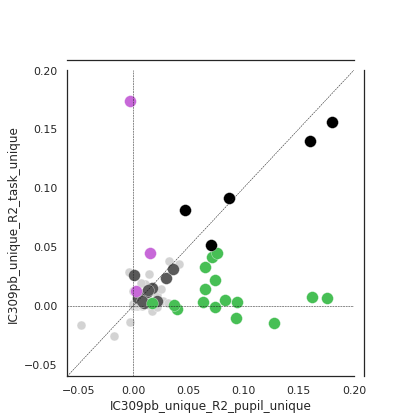

In [35]:
scatter_states(df1=d309_R2_pup_unique, 
               df2=d309_R2_beh_unique,
               margin=False, 
               area='ICX',
               column1='R2_pupil_unique', 
               column2='R2_task_unique',
               brain_region='IC309pb_unique', 
               xlim=(-0.06,0.2), ylim=(-0.06,0.2), 
               dot_size1=80, dot_size2=140)

not sig n = 10
ubeh or upup n = 3
ubeh n = 1
upup n = 4
ubeh and upup = 0


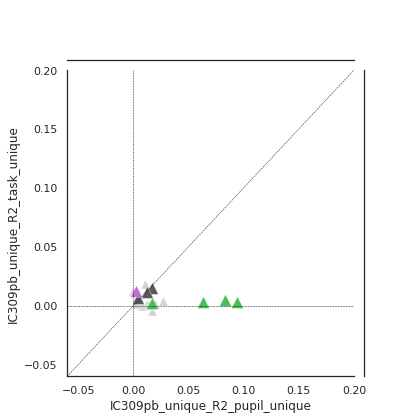

In [36]:
scatter_states(df1=d309_R2_pup_unique_ICC, 
               df2=d309_R2_beh_unique_ICC,
               margin=False, 
               area='ICC',
               column1='R2_pupil_unique', 
               column2='R2_task_unique',
               brain_region='IC309pb_unique', 
               xlim=(-0.06,0.2), ylim=(-0.06,0.2), 
               dot_size1=80, dot_size2=140)

In [37]:
# verify if correlation is significant
(cc_R2_309, p_R2_309)=sci.stats.pearsonr(d309_R2_pup_unique['R2_pupil_unique'], d309_R2_beh_unique['R2_task_unique'])
print(cc_R2_309, p_R2_309)

0.38444385337775905 0.0014375641736581418


[[0.695 0.73  0.007 0.023 0.005 0.444]]


NameError: name 'color_ba' is not defined

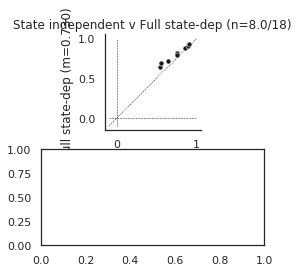

In [38]:
# using SVD function to pull out r2 scatter and stack
aud_vs_state(d_pb309, title='IC309_R2_ICC', nb=1, state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'], area='ICC')

[[0.263 0.338 0.012 0.039 0.023 0.542]]


NameError: name 'color_ba' is not defined

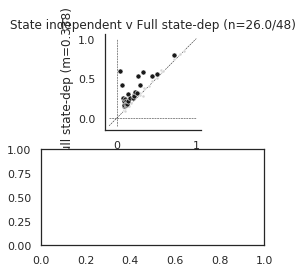

In [40]:
# using SVD function to pull out r2 scatter and stack
aud_vs_state(d_pb309, title='IC309_R2_ICX', nb=1, state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'], area='ICX')

## Same as above but for MI AC and IC

In [41]:
# use one_state funciton to pull a dataframe containing MIbeh unique, wich is the difference between MIpupbeh and MIpupbeh0
d307_MI_beh_unique = one_state(d_pb307, col_idx='MI', state='unique', state_chan_val='active', 
                               state_sig1='st.pup.beh', state_sig2='st.pup.beh0', condition='pb',
                               state_var='task', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

In [42]:
# use one_state funciton to pull a dataframe containing MIpup unique, wich is the difference between MIpupbeh and MIpup0beh
d307_MI_pup_unique = one_state(d_pb307, col_idx='MI', state='unique', state_chan_val='pupil', 
                               state_sig1='st.pup.beh', state_sig2='st.pup0.beh', condition='pb',
                               state_var='pupil', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

In [43]:
# use one_state funciton to pull a dataframe containing MIbeh, wich is the difference between MIpup0beh and MIpup0beh0
d307_MI_beh_only = one_state(d_pb307, col_idx='MI', state='only', state_chan_val='active', 
                               state_sig1='st.pup0.beh', state_sig2='st.pup0.beh0', condition='pb',
                               state_var='task', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

not sig n = 78
ubeh or upup n = 24
ubeh n = 11
upup n = 12
ubeh and upup = 4


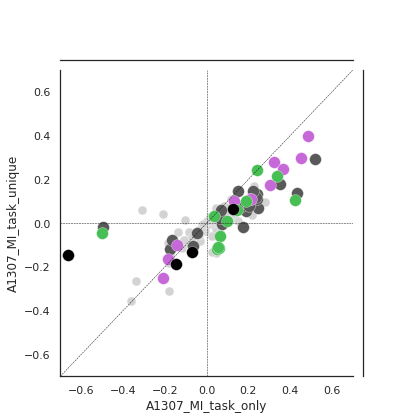

In [44]:
scatter_states(df1=d307_MI_beh_only, 
               df2=d307_MI_beh_unique,
               margin=False, 
               area='A1',
               column1='MI_task_only', 
               column2='MI_task_unique',
               brain_region='A1307', 
               xlim=(-0.7,0.7), ylim=(-0.7,0.7), 
               dot_size1=80, dot_size2=140)

In [45]:
# use one_state funciton to pull a dataframe containing MIbeh unique, wich is the difference between R2pupbeh and R2pupbeh0
d309_MI_beh_unique = one_state(d_pb309, col_idx='MI', state='unique', state_chan_val='active', 
                               state_sig1='st.pup.beh', state_sig2='st.pup.beh0', condition='pb',
                               state_var='task', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state', 'area'])

In [46]:
# use one_state funciton to pull a dataframe containing MIpup unique, wich is the difference between R2pupbeh and R2pup0beh
d309_MI_pup_unique = one_state(d_pb309, col_idx='MI', state='unique', state_chan_val='pupil', 
                               state_sig1='st.pup.beh', state_sig2='st.pup0.beh', condition='pb',
                               state_var='pupil', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state', 'area'])

In [47]:
# use one_state funciton to pull a dataframe containing MIbeh, wich is the difference between MIpup0beh and MIpup0beh0
d309_MI_beh_only = one_state(d_pb309, col_idx='MI', state='only', state_chan_val='active', 
                               state_sig1='st.pup0.beh', state_sig2='st.pup0.beh0', condition='pb',
                               state_var='task', columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state', 'area'])

In [48]:
d309_MI_pup_unique_ICX = d309_MI_pup_unique[d309_MI_pup_unique['area']=='ICX']
d309_MI_beh_unique_ICX = d309_MI_beh_unique[d309_MI_beh_unique['area']=='ICX']
d309_MI_beh_only_ICX = d309_MI_beh_only[d309_MI_beh_only['area']=='ICX']

d309_MI_pup_unique_ICC = d309_MI_pup_unique[d309_MI_pup_unique['area']=='ICC']
d309_MI_beh_unique_ICC = d309_MI_beh_unique[d309_MI_pup_unique['area']=='ICC']
d309_MI_beh_only_ICC = d309_MI_beh_only[d309_MI_beh_only['area']=='ICC']

not sig n = 22
ubeh or upup n = 7
ubeh n = 2
upup n = 12
ubeh and upup = 5


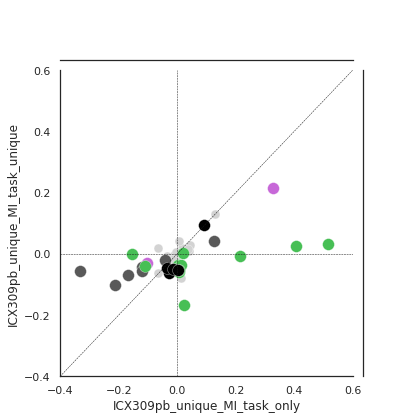

In [49]:
scatter_states(df1=d309_MI_beh_only_ICX, 
               df2=d309_MI_beh_unique_ICX,
               margin=False, 
               area='ICX',
               column1='MI_task_only', 
               column2='MI_task_unique',
               brain_region='ICX309pb_unique', 
               xlim=(-0.4,0.6), ylim=(-0.4,0.6), 
               dot_size1=80, dot_size2=140)

not sig n = 10
ubeh or upup n = 3
ubeh n = 1
upup n = 4
ubeh and upup = 0


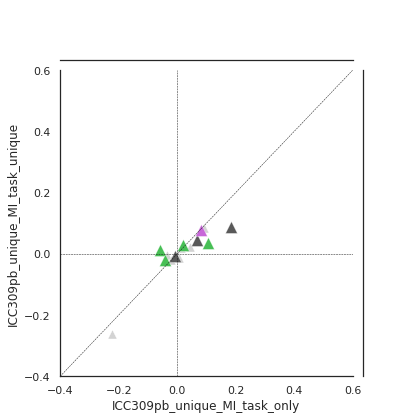

In [50]:
scatter_states(df1=d309_MI_beh_only_ICC, 
               df2=d309_MI_beh_unique_ICC,
               margin=False, 
               area='ICC',
               column1='MI_task_only', 
               column2='MI_task_unique',
               brain_region='ICC309pb_unique', 
               xlim=(-0.4,0.6), ylim=(-0.4,0.6), 
               dot_size1=80, dot_size2=140)

not sig n = 78
ubeh or upup n = 24
ubeh n = 11
upup n = 12
ubeh and upup = 4


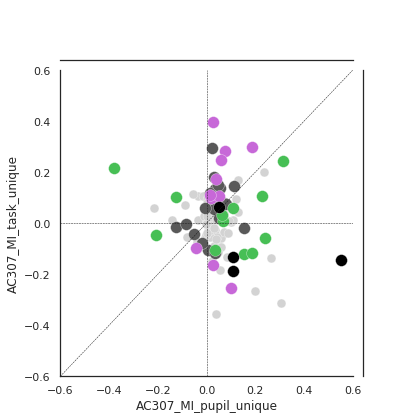

In [51]:
scatter_states(df1=d307_MI_pup_unique, 
               df2=d307_MI_beh_unique,
               margin=False,
               area='A1',
               column1='MI_pupil_unique', 
               column2='MI_task_unique',
               brain_region='AC307', 
               xlim=(-0.6,0.6), ylim=(-0.6,0.6), 
               dot_size1=80, dot_size2=140)

In [52]:
MI307_pup_beh_unique_cc = np.corrcoef(d307_MI_pup_unique['MI_pupil_unique'], d307_MI_beh_unique['MI_task_unique'])
print(MI307_pup_beh_unique_cc)

[[ 1.         -0.14482231]
 [-0.14482231  1.        ]]


In [53]:
# verify if correlation is significant
(cc_MI_307, p_MI_307) = sci.stats.pearsonr(d307_MI_pup_unique['MI_pupil_unique'], d307_MI_beh_unique['MI_task_unique'])
print(cc_MI_307, p_MI_307)

-0.14482231054382744 0.10152606920350146


not sig n = 22
ubeh or upup n = 7
ubeh n = 2
upup n = 12
ubeh and upup = 5


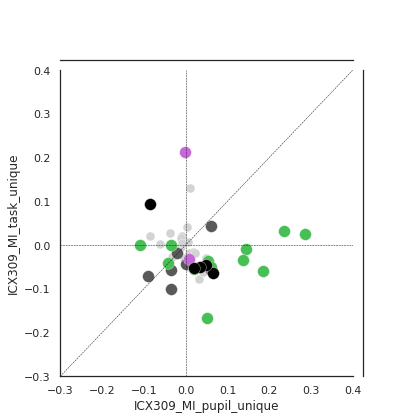

In [54]:
# correlation between pupil unique and behavior unique
scatter_states(df1=d309_MI_pup_unique_ICX, 
               df2=d309_MI_beh_unique_ICX,
               margin=False,
               area='ICX',
               column1='MI_pupil_unique', 
               column2='MI_task_unique',
               brain_region='ICX309', 
               xlim=(-0.3,0.4), ylim=(-0.3,0.4), 
               dot_size1=80, dot_size2=140)

not sig n = 10
ubeh or upup n = 3
ubeh n = 1
upup n = 4
ubeh and upup = 0


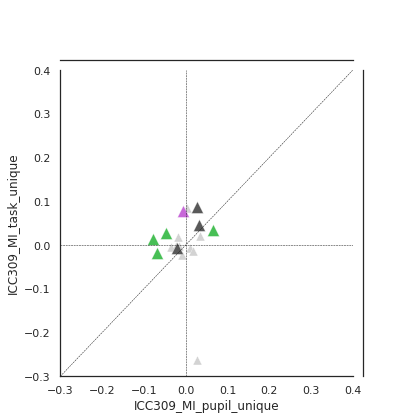

In [55]:
# correlation between pupil unique and behavior unique
scatter_states(df1=d309_MI_pup_unique_ICC, 
               df2=d309_MI_beh_unique_ICC,
               margin=False,
               area='ICC',
               column1='MI_pupil_unique', 
               column2='MI_task_unique',
               brain_region='ICC309', 
               xlim=(-0.3,0.4), ylim=(-0.3,0.4), 
               dot_size1=80, dot_size2=140)

In [56]:
MI309_pup_beh_unique_cc = np.corrcoef(d309_MI_pup_unique['MI_pupil_unique'], d309_MI_beh_unique['MI_task_unique'])
print(MI309_pup_beh_unique_cc)

[[ 1.         -0.08249631]
 [-0.08249631  1.        ]]


In [57]:
# verify if correlation is significant
(cc_MI_309, p_MI_309) = sci.stats.pearsonr(d309_MI_pup_unique['MI_pupil_unique'], d309_MI_beh_unique['MI_task_unique'])
print(cc_MI_309, p_MI_309)

-0.0824963109025587 0.5102029379122626
